# Name-Pranav Narkhede

# Assignment Week-3


In [193]:
#Importing Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [194]:
#Loading the Dataset using pandas
df = pd.read_csv('archive (8)/Bengaluru_House_Data.csv')

#Data of first 5 rows using head() command
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [195]:
#Rows and columns in dataset
df.shape

(13320, 9)

In [196]:
#General info about dataset null,datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [197]:
#Summmarise central tendency,shape,dispersion,quartile
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [198]:
#Checking Null Values 
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

We can see there are null values in location,size,society,bath,balcony.
We will handle each columns and remove null and clean data.

## Handling Location

In [199]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [200]:
df['location'].nunique()

1305

In [201]:
df['location'].mode()

0    Whitefield
Name: location, dtype: object

In [202]:
#Filling the null values using mode 
df['location'] = df['location'].fillna(df['location'].mode()[0])

In [203]:
#Again verify 
df['location'].isna().sum()

0

In [204]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [205]:
#Performing label Encoding to get numerical data
label_encoder = LabelEncoder()

In [206]:
df['location'] = label_encoder.fit_transform(df['location'])

In [207]:
df['location']

0         419
1         317
2        1179
3         757
4         716
         ... 
13315    1252
13316    1004
13317     972
13318     907
13319     396
Name: location, Length: 13320, dtype: int32

## Handling area_type

In [208]:
df['area_type'].nunique()

4

In [209]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [210]:
#Performing Label Encoding
df['area_type'] = label_encoder.fit_transform(df['area_type'])

In [211]:
df['area_type']

0        3
1        2
2        0
3        3
4        3
        ..
13315    0
13316    3
13317    0
13318    3
13319    3
Name: area_type, Length: 13320, dtype: int32

## Handling size

In [212]:
df['size'].nunique()

31

In [213]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [214]:
#Getting Count of NA Values
df['size'].isna().sum()

16

In [215]:
#Count of every entity present    
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [216]:
#Max size of 2BHK so filled NA will that value
df['size'] = df['size'].fillna('2 BHK')

In [217]:
#Extracting only No. of BHK Value like 1,2,3,... BHK 
df['size'] = df['size'].str.split().str.get(0).astype(int)

In [218]:
df['size']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13320, dtype: int32

Dropping availability and society as not helpful in predicting prices

## Handling availability

In [219]:
df = df.drop('availability', axis = True)

## Handling society

In [220]:
df = df.drop('society', axis = True)

## Handling bath

In [221]:
df['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [222]:
df['bath'].isna().sum()

73

In [223]:
#Filling null values with Mean 
df['bath'] = df['bath'].fillna(df['bath'].mean().astype(int))

In [224]:
#Verify if null values removed
df['bath'].isna().sum()

0

## Handling balcony

In [225]:
df['balcony'].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [226]:
df['balcony'].nunique()

4

In [227]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [228]:
df['balcony'].isna().sum()

609

In [229]:
#Filling NA values with Max count entity
df['balcony'] = df['balcony'].fillna(2)

In [230]:
df['balcony'].isna().sum()

0

## Handling total_sqft

In [231]:
df['total_sqft'].value_counts()

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2117, dtype: int64

In [232]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [233]:
#In sqft we are given a range in some cases to when range is given take average and check range values with split function
def convert_range(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1])) / 2
    try:
        return float(x)
    except:
        return None

In [234]:
df['total_sqft'] = df['total_sqft'].apply(convert_range)

In [235]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [236]:
df['total_sqft'].value_counts()

total_sqft
1200.0    843
1100.0    221
1500.0    206
2400.0    196
600.0     180
         ... 
3080.0      1
787.0       1
6613.0      1
502.0       1
4689.0      1
Name: count, Length: 1999, dtype: int64

In [237]:
df['total_sqft'].isna().sum()

46

In [238]:
#Fill NA values with mean
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].mean())

In [239]:
df['total_sqft'].isna().sum()

0

In [240]:
#Perform Standard Scaling to normalise data
std_scaler = StandardScaler()

In [241]:
df['total_sqft'] = std_scaler.fit_transform(df['total_sqft'].values.reshape(-1, 1))

In [242]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,3,419,2,-0.407393,2.0,1.0,39.07
1,2,317,4,0.841577,5.0,3.0,120.00
2,0,1179,3,-0.096768,2.0,3.0,62.00
3,3,757,3,-0.031246,3.0,1.0,95.00
4,3,716,2,-0.290909,2.0,1.0,51.00


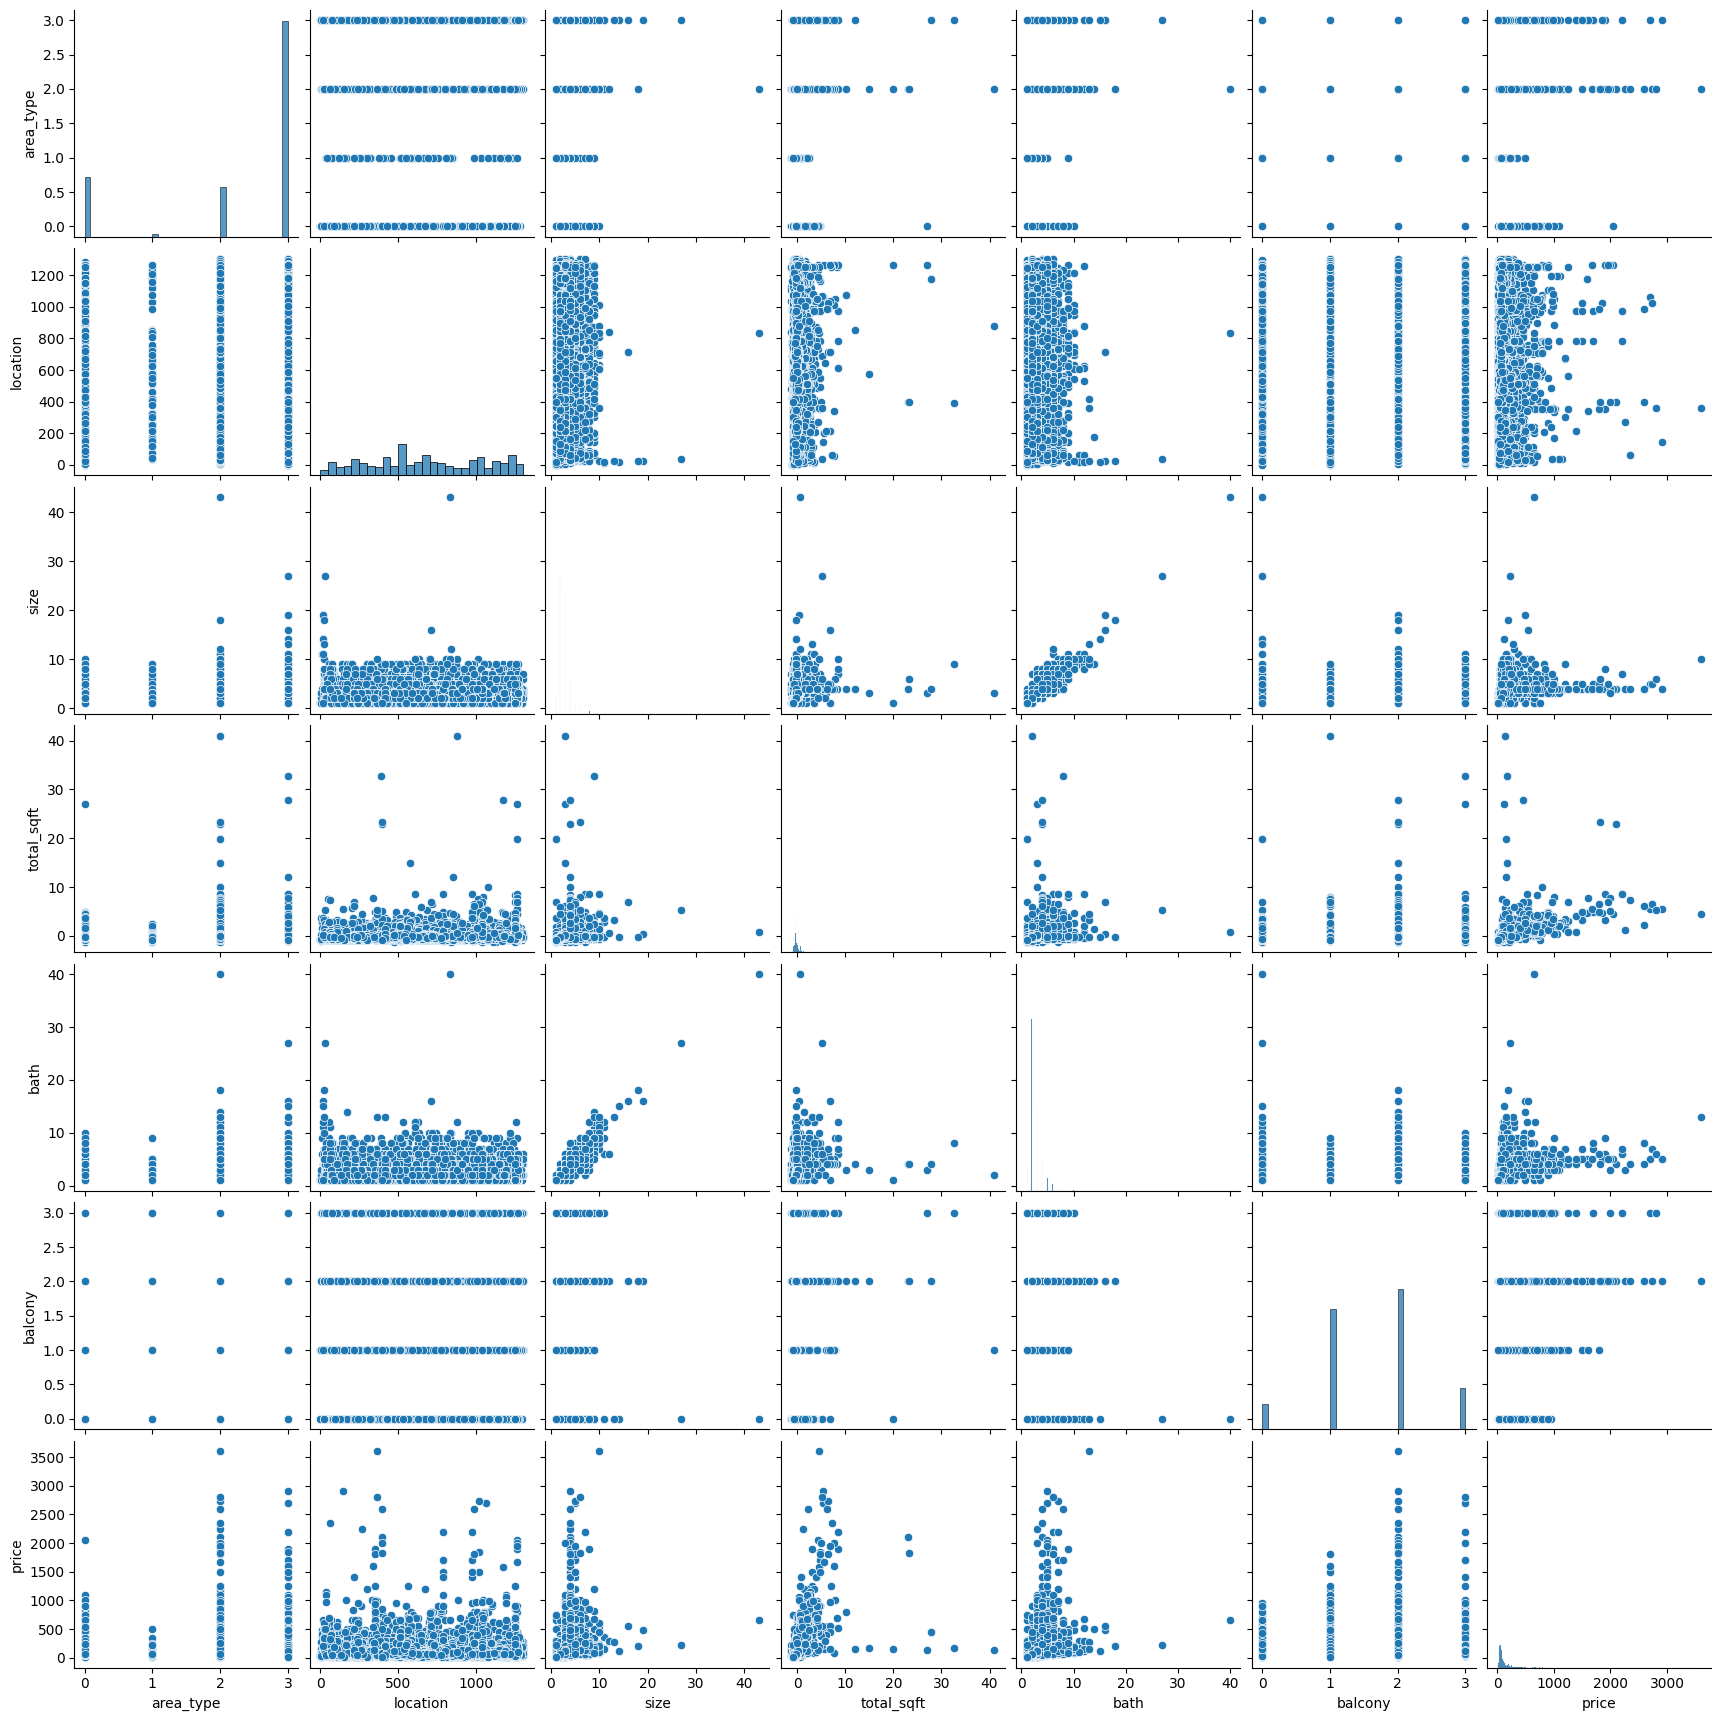

In [243]:
sns.pairplot(df)

<Axes: >

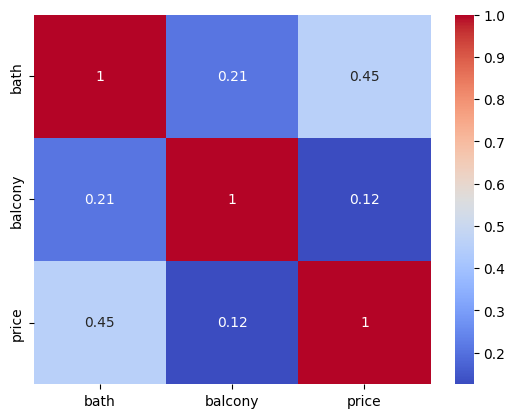

In [244]:
# correlation heatmap
var = ["bath", "balcony", "price"]
sns.heatmap(df[var].corr(),cmap="coolwarm", annot=True)

correlation of bath is greater than a balcony with price


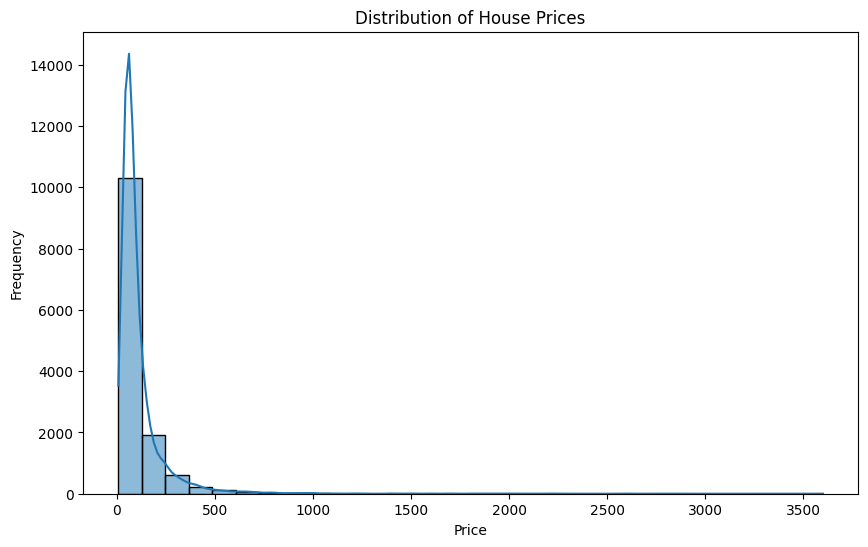

In [245]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

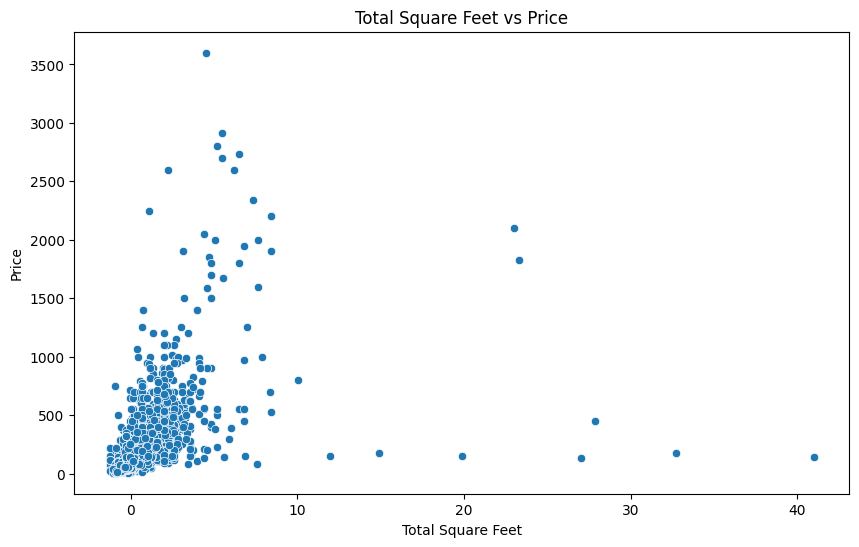

In [246]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Total Square Feet vs Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()


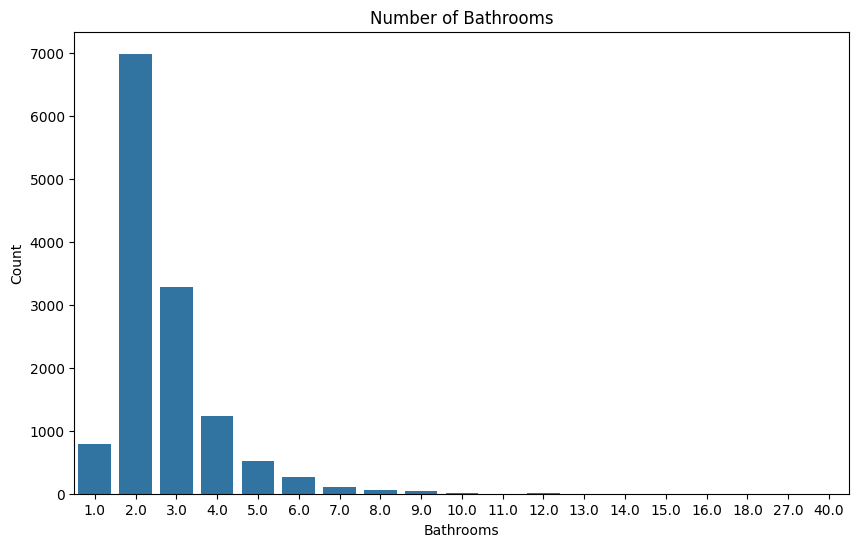

In [247]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bath', data=df)
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()


#High count of 2 bathrooms in houses


C:\Users\Pranav\AppData\Local\Temp\ipykernel_17052\2711168833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='balcony', data=df, palette='pastel')


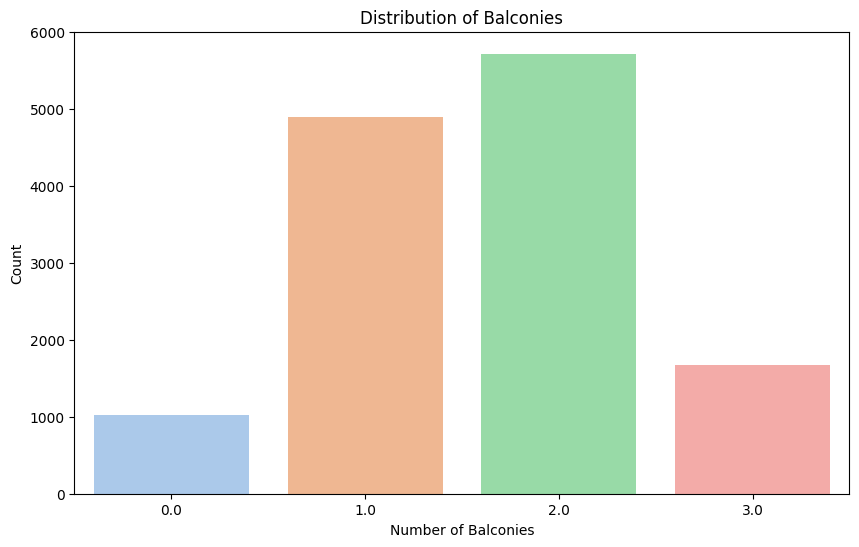

In [248]:
plt.figure(figsize=(10, 6))
sns.countplot(x='balcony', data=df, palette='pastel')
plt.title('Distribution of Balconies')
plt.xlabel('Number of Balconies')
plt.ylabel('Count')
plt.show()

## Train Test Split

In [249]:
#Splitting data in dependent and independent features

X = df.drop('price', axis = True)
y = df['price']

In [250]:
#Split the data in test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)